<a href="https://colab.research.google.com/github/rcolo88/Machine-Learning-HW2/blob/main/HW2_RobertCologero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Homework guideline
- The deadline is Oct 27th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [ ]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


# Modified MNIST
I modified the the original MNIST gray-scale image dataset, where samples of digit 9 belong to class 1, and otherwise class 0. Now it becomes binary logistic regression. 
It contains a training set of images $\texttt{Xtr}$ with labels $\texttt{Ytr}$ and a testing set
of images $\texttt{Xte}$ with labels $\texttt{Yte}$. There are 6000 samples in training sets and 1000 samples in testing sets.

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))



11501568/11490434 [==============================] - 0s 0us/step
Xtr: (6000, 28, 28)
Ytr: (6000,)
Xte: (1000, 28, 28)
Yte: (1000,)


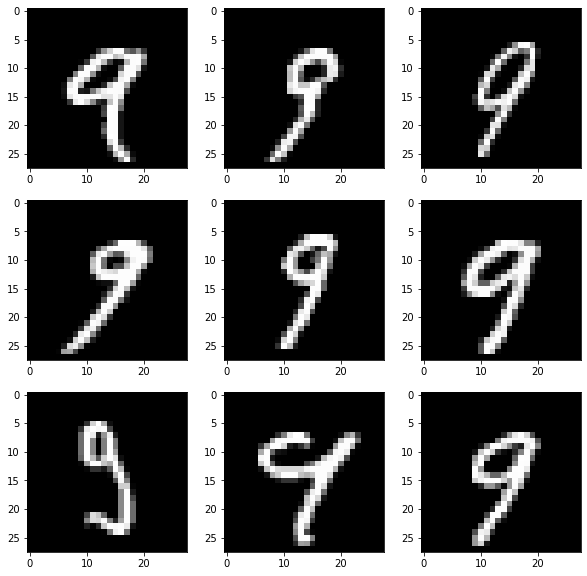

In [ ]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
index = where(Ytr>0)[0]
for i in range(9):
    axs[i].imshow(Xtr[index[i]], cmap=pyplot.get_cmap('gray'))

## Q1: Logistic regression (20pt)

---


### 1. Data preparation for training and testing (5pt)
Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Please count the number of 9 out of these 60000 training set. What is the dimension of the matrix $\mathbf{X}$. Don't forget to do the same preparation for the testing data. 

In [ ]:
#@title Q1.1 your code starts here

# Transforming from tensor to matrix
X = np.reshape(Xtr,(6000,784))
xt = np.reshape(Xte,(1000,784))

# Creating X matrices train/test
xones = np.ones((6000,1))
xtones = np.ones((1000,1))
X = np.column_stack((xones,X))
xt = np.column_stack((xtones,xt))
print(X.shape)
print(xt.shape)

# Creating y matrices train/test
Y = Ytr
yt = Yte
print(Y.shape)
print(yt.shape)

numb_9=np.count_nonzero(Y==1)
print('Number of nines in training set is: '+str(numb_9))

(6000, 785)
(1000, 785)
(6000,)
(1000,)
Number of nines in training set is: 601


### **Your Answer:**
Dimension of the training set X is, 6000 by 785. The number of nines in the training set is 601.


---
### 2. Logistic regression (15pt)

Perform logistic regression with the sigmoid activation function using **mini-batches descent method**. The mini-batch size is 25, the learning rate is $\eta_t = \frac{1}{(1+2t)^3}$ and total iteration number is $50$. You might need to restart the training with better initial conditions. Modify my code to accomodate it. 

Please use the testing set to validate the logistic regression model. What is the test error rate?  Could you plot serveral pictures that logistic regression model misclassified the digit 9. 


In [ ]:
test_m = arange(9)
test_m = test_m.reshape(3,3)
test_m
n,m = test_m.shape
arr = arange(n)
ary = arange(m)
np.random.shuffle(ary)
np.random.shuffle(arr)
print(arr)
print(ary)
np.random.shuffle(test_m)
test_m

# Need to change random.shuffle(X) in logistic regression to form above


[0 1 2]
[1 2 0]


array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

In [ ]:
#@title Q1.2 your code starts here

# Prediction function
def predict(x, w):
	z = w.dot(x)

	return 1.0 / (1.0 + exp(-z))

# train weights function (with initial condition as input)
def train_weights(X, y, l_rate_span, n_iter,IC, threshold=0.002):
  n, m   = X.shape
  weights = IC # Initial condition is always 0 vector. it is a bad idea! 
  # you should modify this code to make IC as an input. Then you can call this call function put the last weight as the new initial condition.
  for iter in range(n_iter):
    l_rate   = l_rate_span[iter]
    sum_error = 0;
    #arr = np.arange(n)
    random.shuffle(X)
    for i in range(240):
      mini_batch = X[i*25:(i+1)*25,:]
 
      out = zeros((25,m))
      for j in range(len(mini_batch)):
        #out = zeros.size((m,1))
        prediction = predict(mini_batch[j,:], weights)
        error      = prediction - y[j]
        out[j,:] = error * X[j,:]
        sum_error  = error**2 + sum_error
    
      sum_out = sum(out,axis = 0)
      weights = weights - (l_rate/25)*sum_out
    
    #print('sum_error at ',iter+1, 'iteration is ', sum_error)
    if sum_error == 0:
      break

  return weights

# first initial condition (ones vector)
n,m = X.shape
frst_ic = ones(m)

# logistic regression on training
n_iter = 50
n_span = arange(50)
l_rate_span = 1/((1+2 * n_span)**3) 
weights = train_weights(X, Y, l_rate_span, n_iter,frst_ic) #you should restart with the new IC. 
print(weights.shape)
weights = train_weights(xt, yt, l_rate_span, n_iter,weights) #you should restart with the new IC. 
#print(weights1)

# Predict y using xtrain
ypred = predict(weights,xt)  # Use new weights 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


(785,)


In [ ]:
# test error
print('Test error is: ' + str(norm(ypred-yt,0)/1000*100) + '%')


Test error is: 24.9%


[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0.]


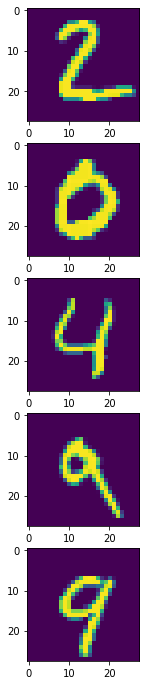

In [ ]:

print(yt[:30])
print(ypred[:30])


# not robust by any means, prints misclassified, change range size from 15 to smaller if error
fig, ax = plt.subplots(5,1, figsize=(8, 12)) #subplots of size Nx3 (3x3)
a=0
for i in range(15):
  if ypred[i] != yt[i]:
    plt.sca(ax[a])
    plt.imshow(Xte[i])
    a=a+1
    




### **Your Answer:**
The test error rate hovers around 22%. 






## Q2: Support Vector Machine (50pt)


---

### 1. Data preparation for training and testing (5pt)
Remember in SVM we move the interception out and define the class label is $\pm1$. Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Don't forget to do the same preparation for the testing data. 

Can you impose the hard margin classifier for this problem? Why or why not?


In [ ]:
 #@title Q2.1 your code starts here

# Transforming from tensor to matrix
X = np.reshape(Xtr,(6000,784))
xt = np.reshape(Xte,(1000,784))

# Transform y 
Ytr[Ytr == 0] = -1
Yte[Yte == 0] = -1
Y = Ytr
yt = Yte




### **Your Answer:**
You cannot impose a hard margin for this problem because if you could then the logistic test error would be zero and the data would be easily linearly seperable.



---


### 2. Soft Margin with Hinge Loss (15pt)
Perform the soft margin with hinge loss using stochastic gradient descent method. 
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in \mathbb{R}} \lambda\sum_{i=1}^N \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\} +\frac{1}{2} \|\mathbf{w}\|_2^2 }$$
The learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows, 
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$. 
You might need to restart the training with better initial conditions. 


In [ ]:
 #@title Q2.2 your code starts here

def predict(x, w, w0):
	activation = w.dot(x)+w0

	return 1 if activation >= 0.0 else -1

def train_weights(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape       
  w   = ones(784)*(-1) 
  w[1] = 2            
  w0  = 2
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1
          
          if condition:
            w = w - learning_rate *  w

          else:
            w  = w - learning_rate * (w - lambda_param *y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -lambda_param * y[i] ) 
    #print(iter)
  return w, w0




In [ ]:
# creating parameters for hinge loss svm 
n_iter = 100
n_span = arange(n_iter)
l_rate_span = 1/((1+ 2*n_span)**2)
lambda_param =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# new predict for test 
def predict1(x, w, w0):
	activation = w.dot(x)+w0

	return activation

# loop to run and predict outcome for each lambda
for i in lambda_param:
  weights=train_weights(X,Y,l_rate_span,i,n_iter=100)
  w=weights[0]              # retrieve w
  w0=weights[1]             # retrive w0
  ypred = predict1(w,xt,w0)  # predicting x test instead of train 
  ypred[ypred<0]=-1         # round values to either -1, or 1 
  ypred[ypred>0]=1

  # test error
  print('Test error at '+ str(i)+' is: ' + str(norm(ypred-Yte,0)/1000*100) + '%')



Test error at 0.0001 is: 9.6%
Test error at 0.001 is: 3.5000000000000004%
Test error at 0.01 is: 9.5%
Test error at 0.1 is: 11.5%
Test error at 1 is: 8.3%
Test error at 10 is: 6.4%
Test error at 100 is: 5.4%


### **Your Answer:**
It appears lambda = 0.001 works the best majority of the time, however 0.01 does perform better now and then.



---


### 3. Prepare for soft margin with log loss (10pt)
Please compute the following two gradient:
$$ \nabla_\mathbf{w} \log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)= $$

$$ \nabla_{w_0}\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=$$

### **Your Answer:**
$$ \nabla_\mathbf{w} \log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)= $$

$$ \nabla_\mathbf{w} = {w}-\lambda\frac{y^{(i)}{x}^{(i)}}{1+e^{y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0) } }$$


$$ \nabla_{w_0}\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=$$

$$ \nabla_\mathbf{w_0} = -\lambda\frac{y^{(i)}}{1+e^{y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0) } }$$



---


### 4. Soft Margin with Log Loss (20pt)
Perform the soft margin with log loss using stochastic gradient descent method.
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in\mathbb{R}}  \lambda \sum_{i=1}^N\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)  +\frac{1}{2}\|\mathbf{w}\|_2^2 } $$
Similarly, the learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows, 
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$. 
You might need to restart the training with better initial conditions. 


In [ ]:
 #@title Q2.4 your code starts here

def train_weights(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape       
  w   = ones(784)*(-1)  
  w[1] = 2            
  w0  = 2
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
      qx = (exp(y[i]*(w.dot(X[i])+w0)))

      #q = y[i]
      #x = (w.dot(X[i]+w0))
      #denom = exp(q*x)+1
      #a = (lambda_param*q*x)/denom
      w = w - learning_rate * (w - (lambda_param*y[i]*X[i])/(1+qx))
      w0 = w0 -learning_rate * (-(lambda_param*y[i])/(1+qx))

  return w, w0





In [ ]:
# creating parameters for log loss svm 
n_iter = 100
n_span = arange(n_iter)
l_rate_span = 1/((1+ 2*n_span)**2)
lambda_param =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# loop to run and predict outcome for each lambda
for i in lambda_param:
  weights=train_weights(X,Y,l_rate_span,i,n_iter=100)
  w=weights[0]              # retrieve w
  w0=weights[1]             # retrive w0
  ypred = predict1(w,xt,w0)  # predicting x test instead of train 
  ypred[ypred<0]=-1         # round values to either -1, or 1 
  ypred[ypred>0]=1

  # test error
  print('Test error at '+ str(i)+' is: ' + str(norm(ypred-Yte,0)/1000*100) + '%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Test error at 0.0001 is: 9.700000000000001%
Test error at 0.001 is: 4.8%
Test error at 0.01 is: 3.3000000000000003%
Test error at 0.1 is: 4.6%
Test error at 1 is: 6.9%
Test error at 10 is: 7.3%
Test error at 100 is: 9.4%
Test error at 1000 is: 6.6000000000000005%
Test error at 10000 is: 5.8999999999999995%


### **Your Answer:**
I could not get it debugged properly.


---


### 5. Optional problem: try the kernel trick 
You can try to use the kernel trick with various different $\sigma^2$ and $\lambda$. What is your difficulty and your findings here? 

### **Your Answer:**





## Q3: $k$-NN on Iris data (30pt)


---

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a $150\times4$ matrices.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.




In [ ]:
# you are not allowed to use other package and modules 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# Split in training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, stratify=y)

print(x_train.shape)
print(x_test.shape)

(60, 4)
(90, 4)


## 1. Use 5-fold cross validation to find optimal $k$ (20pt)
Here we only use the training dataset, `X_train` and `y_train`. We will test $k$ range from 1 to 21. For each $k$, we will use 5-fold cross validation to estimate the average misclassification rate. Please plot the average misclassification rate verse $k$ and find the optimal $k$. 

21


Text(0.5, 1.0, '5-fold cross validation, n-train = 100')

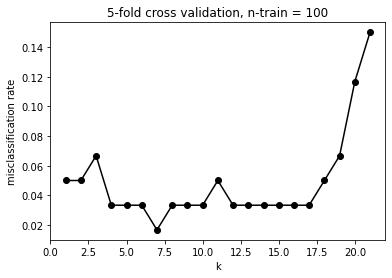

In [ ]:
 #@title Q3.1 your code starts here
#@title my KNN implementation
def myknn_predict(k, x_train, y_train, x_test):
  labelEst = np.zeros(x_test.shape[0])
  for i, x in enumerate(x_test):
    dist            = norm(x_train - x, axis=1) # 2-norm
    dist_sort_index = argsort(dist)
    neigh_labels    = y_train[dist_sort_index[0:k]]
    labelEst[i]     = argmax(bincount(neigh_labels)) # simple majority rule
  return labelEst

#@title 5-fold cross_validate
# we only use the training data. 
ks = arange(1,22,1)
print(ks.size)
# we only use the training data. 
scores     = []
CV         = 5
N_train    = y_train.shape[0]
batch      = N_train/CV
for k in ks:
  x_train_CV = split(x_train, CV)
  y_train_CV = split(y_train, CV)
  test_errs  = []
  for i in range(CV):
    index = delete(arange(CV),i)
    x_train_CV_i = vstack([x_train_CV[j] for j in index])
    y_train_CV_i = hstack([y_train_CV[j] for j in index])
    x_test_CV_i  = x_train_CV[i]
    y_test_CV_i  = y_train_CV[i]

    y_test_CV_i_predicted = myknn_predict(k, x_train_CV_i, y_train_CV_i, x_test_CV_i)
    test_errs.append(norm(y_test_CV_i_predicted - y_test_CV_i, 0)/batch)

  scores.append(mean(test_errs))  

plt.figure()
plt.plot(ks, scores, 'ko-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 100')


## 2. Use optimal $k$ to predict in the test dataset (10pt)
Now we have the optimal $k$. We will apply the optimal $k$-NN on the test dataset and please estimate the misclassification rate in the test dataset. 

In [ ]:
out = 1
for i in scores[1:]:
  if i == min(scores):
    print('optimal k is: '+str(out+1))
    k=out+1
    break
  else:
    out = out+1

y_test_predicted  = myknn_predict(k, x_train, y_train, x_test)
print(y_test_predicted)


optimal k is: 7
[2. 0. 2. 2. 1. 0. 2. 0. 0. 1. 1. 1. 2. 2. 2. 2. 0. 2. 2. 2. 0. 1. 0. 1.
 0. 0. 1. 1. 2. 1. 2. 1. 0. 1. 2. 2. 2. 0. 0. 1. 1. 1. 1. 1. 1. 2. 0. 2.
 0. 2. 1. 0. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 2. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 2. 0. 0. 0. 0.]


In [ ]:
er = norm(y_test_predicted-y_test,0)/90*100
er=round(er,3)
print('Test error is: ' + str(er) + '%')

Test error is: 5.556%
